In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2014y15 = pd.read_csv('espana-master/2010s/2014-15/es.1.csv')
new = df_laliga_2014y15['FT'].str.split('-',n=1,expand=True)
df_laliga_2014y15['GolesLocal']=new[0]
df_laliga_2014y15['GolesVisitante']=new[1]
df_laliga_2014y15

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Sat Aug 23 2014,Málaga CF,1-0,Athletic Club Bilbao,1,0
1,1,Sat Aug 23 2014,Granada CF,2-1,RCD La Coruña,2,1
2,1,Sat Aug 23 2014,Sevilla FC,1-1,Valencia CF,1,1
3,1,Sat Aug 23 2014,UD Almería,1-1,RCD Espanyol,1,1
4,1,Sun Aug 24 2014,SD Eibar,1-0,Real Sociedad,1,0
...,...,...,...,...,...,...,...
375,38,Sat May 23 2015,RC Celta Vigo,3-2,RCD Espanyol,3,2
376,38,Sat May 23 2015,UD Almería,2-3,Valencia CF,2,3
377,38,Sat May 23 2015,Granada CF,0-0,Atlético Madrid,0,0
378,38,Sat May 23 2015,Rayo Vallecano,2-4,Real Sociedad,2,4


In [3]:
df_laliga_2014y15['GolesLocal']=pd.to_numeric(df_laliga_2014y15['GolesLocal'], downcast="float")
df_laliga_2014y15['GolesVisitante']=pd.to_numeric(df_laliga_2014y15['GolesVisitante'], downcast="float")
df_laliga_2014y15['TotalGolesPartido'] = df_laliga_2014y15['GolesLocal']+df_laliga_2014y15['GolesVisitante']
df_laliga_2014y15

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Sat Aug 23 2014,Málaga CF,1-0,Athletic Club Bilbao,1.0,0.0,1.0
1,1,Sat Aug 23 2014,Granada CF,2-1,RCD La Coruña,2.0,1.0,3.0
2,1,Sat Aug 23 2014,Sevilla FC,1-1,Valencia CF,1.0,1.0,2.0
3,1,Sat Aug 23 2014,UD Almería,1-1,RCD Espanyol,1.0,1.0,2.0
4,1,Sun Aug 24 2014,SD Eibar,1-0,Real Sociedad,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
375,38,Sat May 23 2015,RC Celta Vigo,3-2,RCD Espanyol,3.0,2.0,5.0
376,38,Sat May 23 2015,UD Almería,2-3,Valencia CF,2.0,3.0,5.0
377,38,Sat May 23 2015,Granada CF,0-0,Atlético Madrid,0.0,0.0,0.0
378,38,Sat May 23 2015,Rayo Vallecano,2-4,Real Sociedad,2.0,4.0,6.0


In [4]:
df_laliga_2014y15['TotalGolesPartido'].sum()

1009.0

In [5]:
RealMadridL_3 = df_laliga_2014y15.loc[df_laliga_2014y15['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_3.reset_index(inplace=True)

RealMadridL_3

,index,GolesLocal
0,8,2.0
1,23,1.0
2,40,5.0
3,69,5.0
4,82,3.0
5,103,5.0
6,132,3.0
7,170,3.0
8,200,4.0
9,209,2.0


In [7]:
RealMadridV_3 = df_laliga_2014y15.loc[df_laliga_2014y15['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_3.reset_index(inplace=True)

RealMadridV_3


,index,GolesVisitante
0,18,2.0
1,31,8.0
2,51,2.0
3,71,5.0
4,91,4.0
5,112,4.0
6,123,2.0
7,140,4.0
8,165,1.0
9,184,3.0


In [8]:
Madrid_Tot_3=pd.merge(RealMadridL_3, RealMadridV_3, left_index=True, right_index=True)
Madrid_Tot_3

,index_x,GolesLocal,index_y,GolesVisitante
0,8,2.0,18,2.0
1,23,1.0,31,8.0
2,40,5.0,51,2.0
3,69,5.0,71,5.0
4,82,3.0,91,4.0
5,103,5.0,112,4.0
6,132,3.0,123,2.0
7,170,3.0,140,4.0
8,200,4.0,165,1.0
9,209,2.0,184,3.0


In [9]:
Madrid_Tot_3['GolesTotales']=Madrid_Tot_3['GolesLocal']+Madrid_Tot_3['GolesVisitante']
Madrid_Tot_3

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,8,2.0,18,2.0,4.0
1,23,1.0,31,8.0,9.0
2,40,5.0,51,2.0,7.0
3,69,5.0,71,5.0,10.0
4,82,3.0,91,4.0,7.0
5,103,5.0,112,4.0,9.0
6,132,3.0,123,2.0,5.0
7,170,3.0,140,4.0,7.0
8,200,4.0,165,1.0,5.0
9,209,2.0,184,3.0,5.0


In [10]:
Madrid_Tot_3['GolesLocal'].describe()

count    19.000000
mean      3.421053
std       2.036222
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       9.000000
Name: GolesLocal, dtype: float64

In [11]:
Madrid_Tot_3['GolesLocal'].sum()

65.0

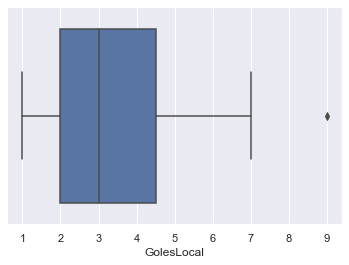

In [36]:
sns.boxplot(x=Madrid_Tot_3['GolesLocal'])
plt.show()

In [13]:
Madrid_Tot_3['GolesVisitante'].describe()

count    19.000000
mean      2.789474
std       1.902599
min       0.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       8.000000
Name: GolesVisitante, dtype: float64

In [14]:
Madrid_Tot_3['GolesVisitante'].sum()

53.0

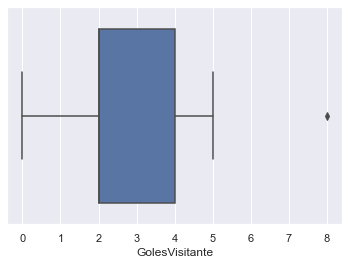

In [37]:
sns.boxplot(x=Madrid_Tot_3['GolesVisitante'])
plt.show()

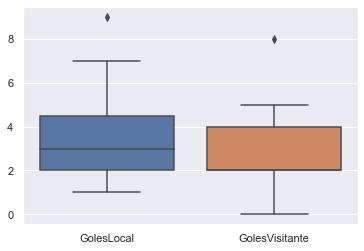

In [16]:
sns.boxplot(data=Madrid_Tot_3.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


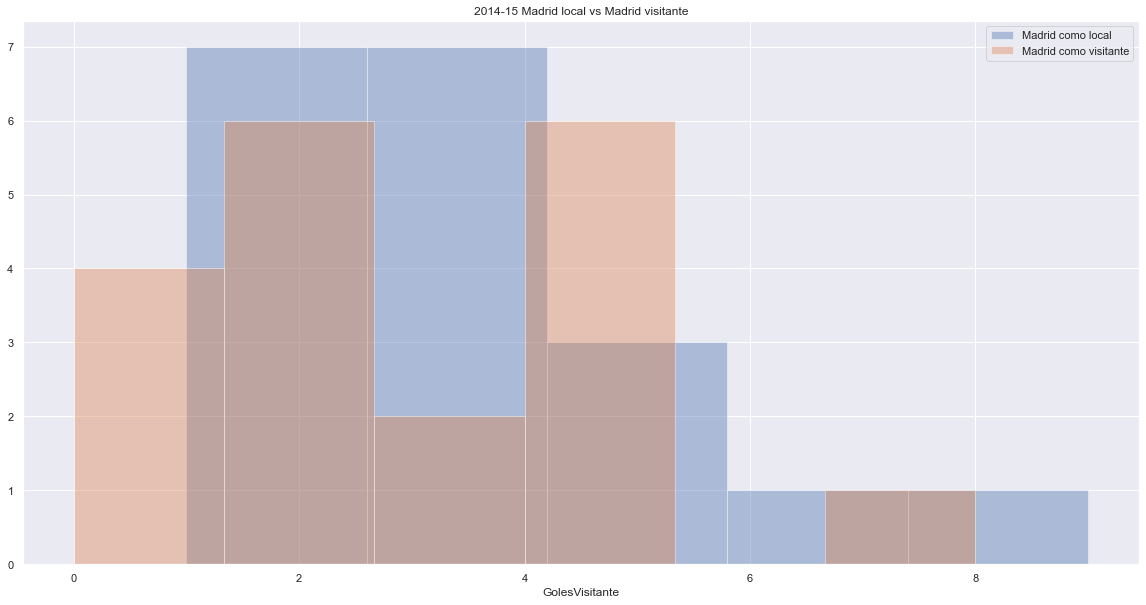

In [18]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_3['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_3['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2014-15 Madrid local vs Madrid visitante")
plt.legend()

Eje y: nº de partidos. Eje x: nº de Goles.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


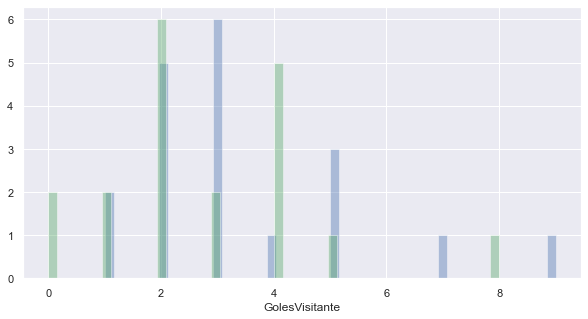

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_3['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_3['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

En azul Madrid como visitante. En verde Madrid como local. Eje y: nº de partidos. Eje x: nº de goles

In [20]:
#Vamos ahora con el análisis del Barcelona
BarsaL_3 = df_laliga_2014y15.loc[df_laliga_2014y15['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_3.reset_index(inplace=True)
BarsaL_3

,index,GolesLocal
0,6,3.0
1,21,2.0
2,52,6.0
3,73,3.0
4,93,0.0
5,113,5.0
6,135,5.0
7,151,5.0
8,177,3.0
9,207,3.0


In [21]:
BarsaV_3 = df_laliga_2014y15.loc[df_laliga_2014y15['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_3.reset_index(inplace=True)
BarsaV_3

,index,GolesVisitante
0,16,1.0
1,38,5.0
2,45,0.0
3,62,2.0
4,82,1.0
5,101,2.0
6,128,1.0
7,141,0.0
8,167,0.0
9,186,4.0


In [40]:
BarsaTot_3=pd.merge(BarsaL_3, BarsaV_3, left_index=True, right_index=True)
BarsaTot_3['GolesTotales']=BarsaTot_3['GolesLocal']+BarsaTot_3['GolesVisitante']

BarsaTot_3

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,6,3.0,16,1.0,4.0
1,21,2.0,38,5.0,7.0
2,52,6.0,45,0.0,6.0
3,73,3.0,62,2.0,5.0
4,93,0.0,82,1.0,1.0
5,113,5.0,101,2.0,7.0
6,135,5.0,128,1.0,6.0
7,151,5.0,141,0.0,5.0
8,177,3.0,167,0.0,3.0
9,207,3.0,186,4.0,7.0


In [23]:
BarsaTot_3['GolesLocal'].sum()

64.0

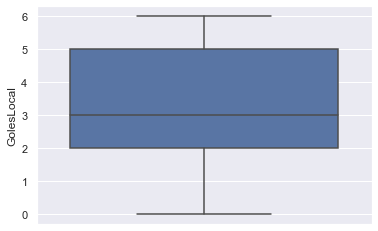

In [24]:
sns.boxplot(y=BarsaTot_3['GolesLocal'])
plt.show()

In [25]:
BarsaTot_3['GolesVisitante'].sum()

46.0

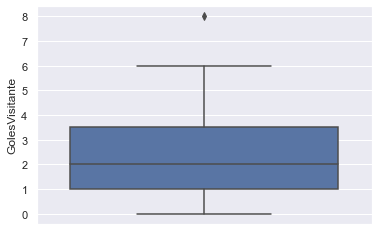

In [26]:
sns.boxplot(y=BarsaTot_3['GolesVisitante'])
plt.show()

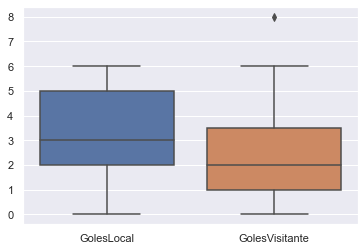

In [27]:
sns.boxplot(data=BarsaTot_3.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


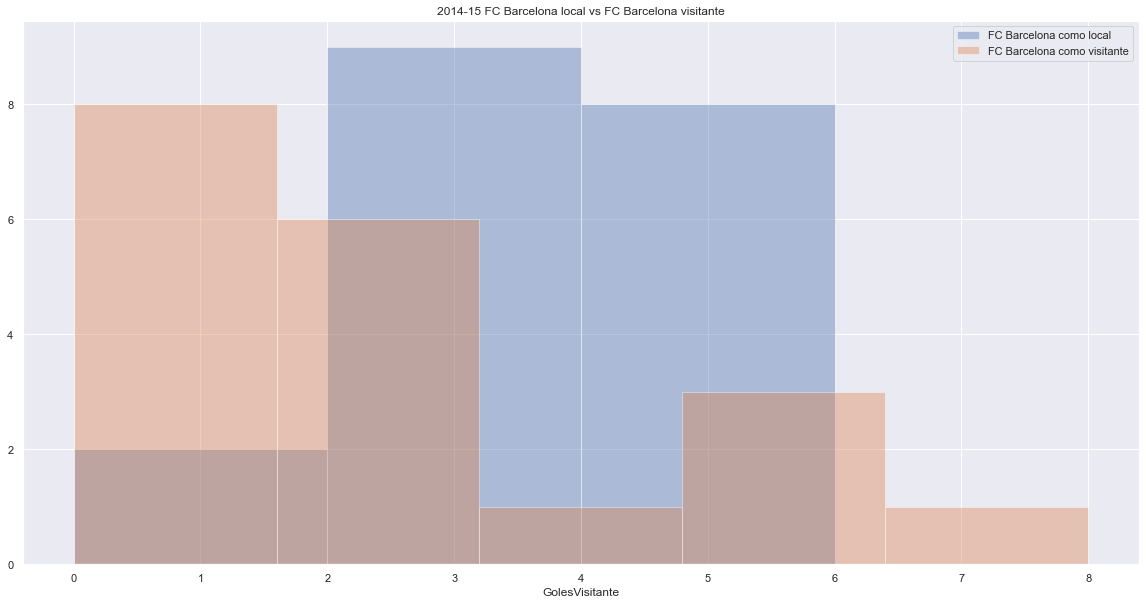

In [28]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_3['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_3['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2014-15 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

Text(0.5, 1.0, '2014-15 FC Barcelona local vs FC Barcelona visitante')

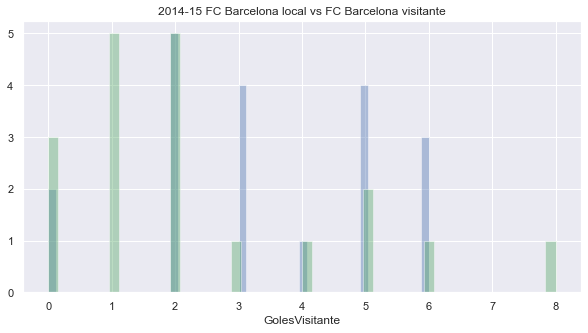

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_3['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_3['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2014-15 FC Barcelona local vs FC Barcelona visitante")

Ahora comparamos ambos equipos:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


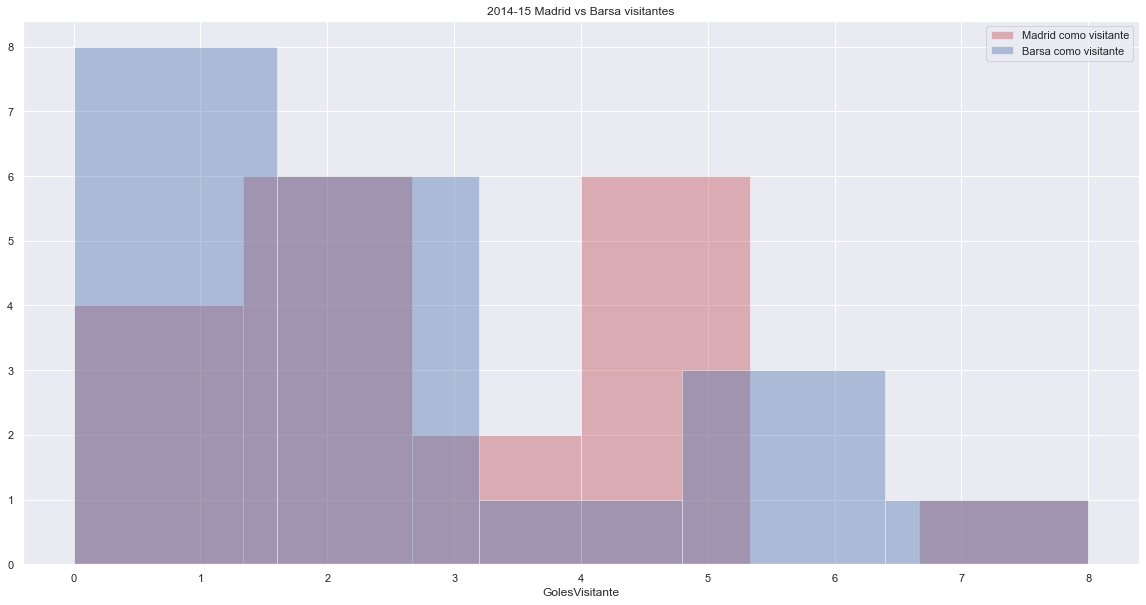

In [31]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_3['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_3['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2014-15 Madrid vs Barsa visitantes")
plt.legend()

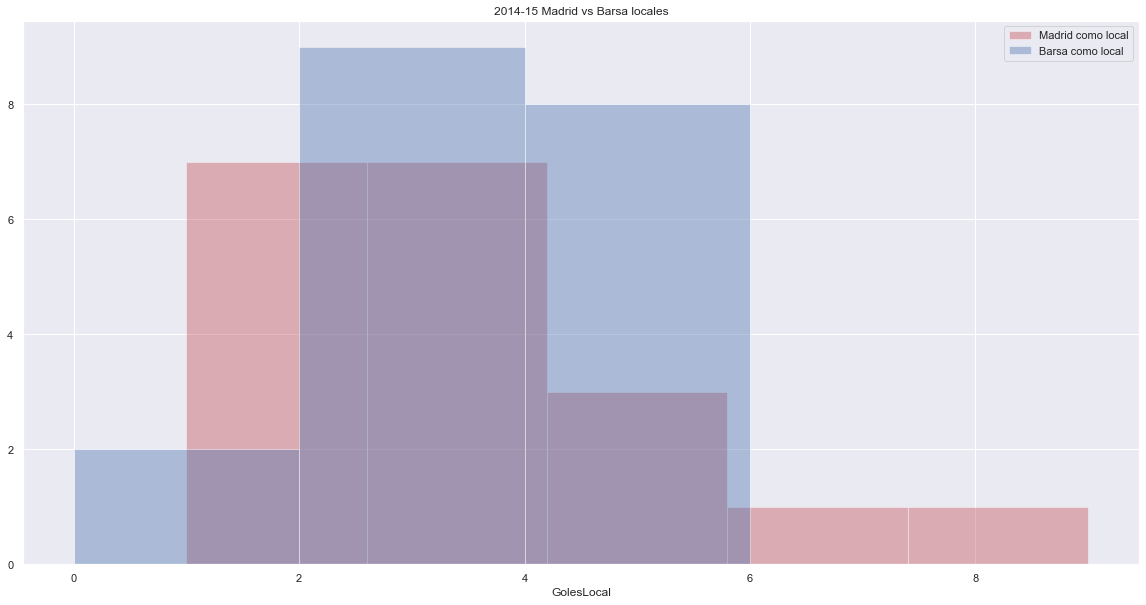

In [32]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_3['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_3['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2014-15 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


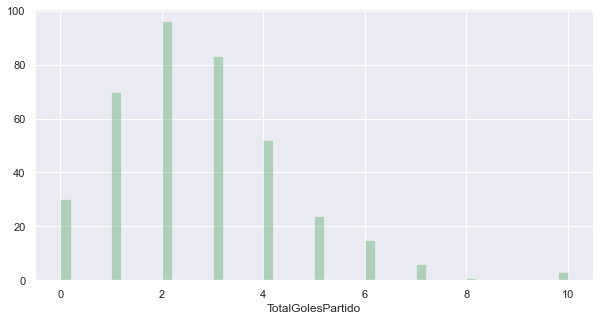

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2014y15['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);

Repartición de los goles a lo largo de la temporada. Eje x: total goles en un encuentro. Eje y: nº de veces que se dió ese suceso

<AxesSubplot:xlabel='Team 1', ylabel='GolesLocal'>

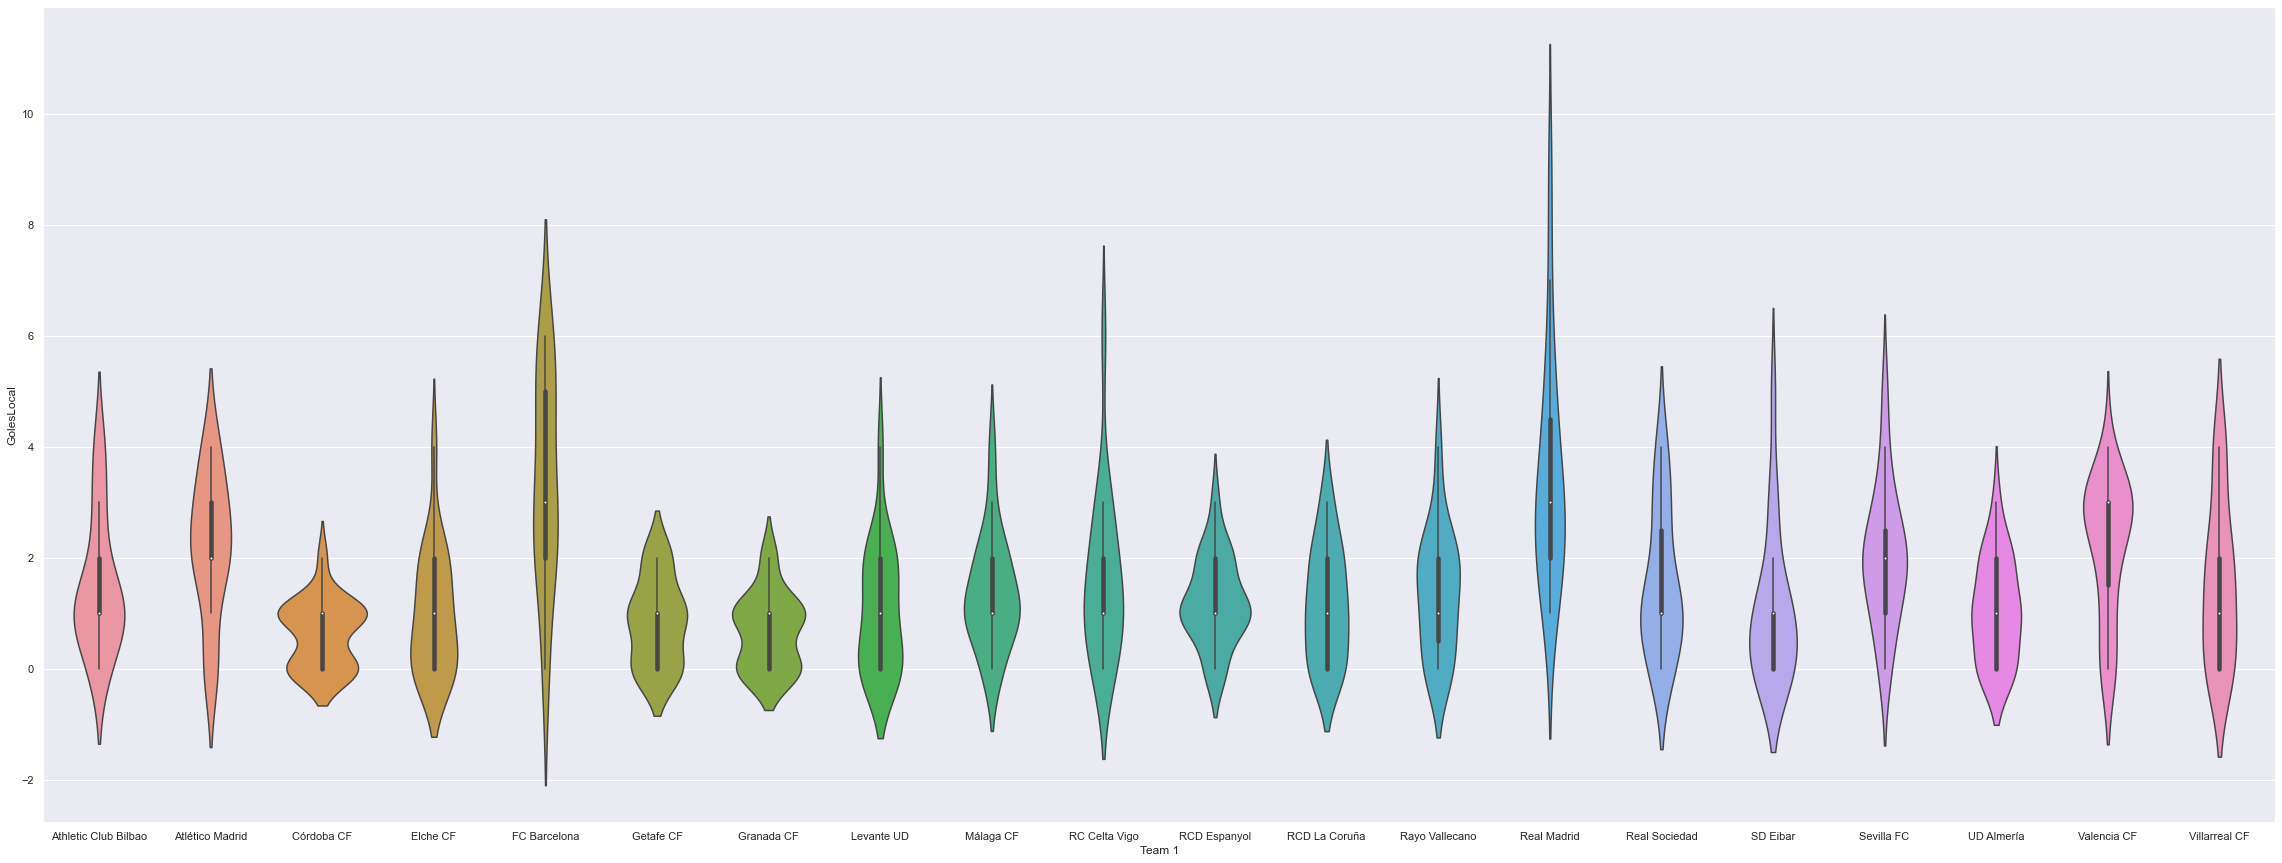

In [34]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2014y15['Team 1'].sort_values(), y=df_laliga_2014y15['GolesLocal'])

<AxesSubplot:xlabel='Team 2', ylabel='GolesVisitante'>

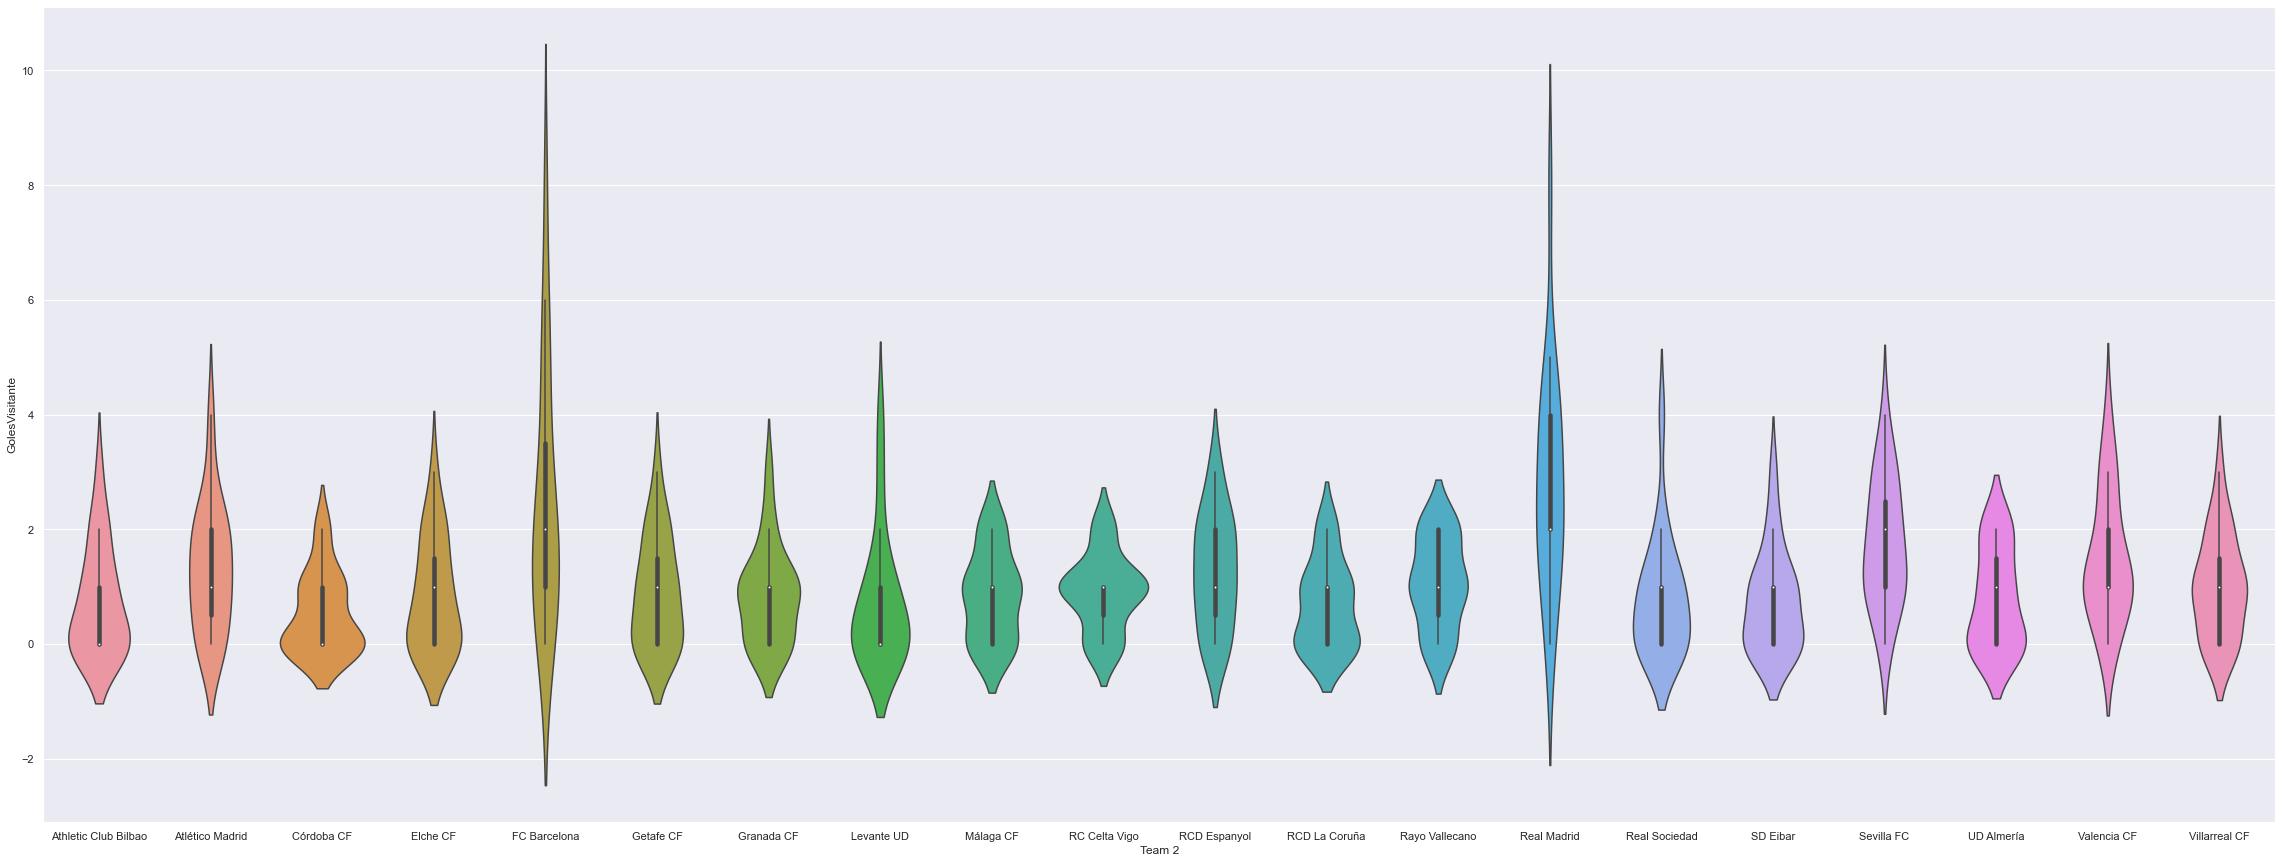

In [35]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2014y15['Team 2'].sort_values(), y=df_laliga_2014y15['GolesVisitante'])

Ganador de la liga: FC Barcelona

In [38]:
Madrid_Tot_3['GolesTotales'].sum()

118.0

In [41]:
BarsaTot_3['GolesTotales'].sum()

110.0